Q1

The probability that an employee is a smoker given that he/she uses the health insurance plan can be calculated using Bayes' theorem. Let S be the event that an employee is a smoker and H be the event that an employee uses the health insurance plan. Then, we want to find P(S|H), which is the probability of S given H. Bayes' theorem states that:

P(S|H) = P(H|S) * P(S) / P(H)

where P(H|S) is the probability of using the health insurance plan given that the employee is a smoker, P(S) is the overall probability of being a smoker, and P(H) is the overall probability of using the health insurance plan.

From the problem statement, we know that P(H|S) = 0.4, P(H) = 0.7, and P(S) is unknown. However, we can use the fact that 70% of employees use the health insurance plan to estimate P(S):

P(S) = P(S and H) + P(S and not H)
     = P(H|S) * P(S) + P(not H|S) * P(S)
     = 0.4 * P(S) + 0.6 * P(S)
     = P(S)

Solving for P(S), we get:

P(S) = 0.7 * 0.4 / 0.7
     = 0.4

Therefore, the probability that an employee is a smoker given that he/she uses the health insurance plan is:

P(S|H) = 0.4 * 0.4 / 0.7
       ≈ **0.229**

So, there is approximately a **22.9%** chance that an employee who uses the health insurance plan is a smoker.


Q2

Bernoulli Naive Bayes and Multinomial Naive Bayes are two variants of the Naive Bayes classification algorithm that are used for different types of data and problem scenarios. The key difference between them lies in the nature of the data they are designed to handle:

1. **Bernoulli Naive Bayes**:
   - **Data Type**: Bernoulli Naive Bayes is suitable for binary or binary-like data, where features are typically represented as binary values (0 or 1), indicating the absence or presence of a feature.
   - **Applications**: It is commonly used in text classification tasks, especially for document or text categorization, where the presence or absence of specific words or features in a document is considered.
   - **Mathematical Assumption**: Bernoulli Naive Bayes assumes that each feature is binary and independent of all other features within a class.

2. **Multinomial Naive Bayes**:
   - **Data Type**: Multinomial Naive Bayes is designed for data that represents counts or frequencies of features. It is suitable for discrete data, often used in text classification, where features are represented as counts of word occurrences or term frequencies.
   - **Applications**: It is also widely used in text classification, including spam detection, sentiment analysis, and topic modeling, where the focus is on the frequency of words.
   - **Mathematical Assumption**: Multinomial Naive Bayes assumes that features are drawn from a multinomial distribution, where each feature can take on multiple discrete values.

In summary, the primary distinction between Bernoulli Naive Bayes and Multinomial Naive Bayes is the type of data they are tailored for. Bernoulli Naive Bayes is used when dealing with binary features, such as word presence/absence, while Multinomial Naive Bayes is used for count-based or frequency-based data, often in the context of text classification. The choice between these two variants depends on the nature of the data and the specific requirements of the classification task.|

Q3

Bernoulli Naive Bayes, like other Naive Bayes variants, does not explicitly handle missing values. Missing values are typically treated as a separate category or state within the model, and the algorithm does not impute or predict missing values. Instead, missing values are considered in the calculations along with the observed values during the classification process.

Here's how Bernoulli Naive Bayes handles missing values:

1. **Missing Values as a Separate State**:
   - Missing values are treated as a distinct state or category. In the context of Bernoulli Naive Bayes, this means that if a feature is missing for a particular data point, it is considered a separate category alongside the binary categories (e.g., "feature is present" or "feature is absent").

2. **Impact on Probability Calculations**:
   - When calculating probabilities, the model considers the presence of the missing value category as one of the possibilities. This means that for each feature, the classifier takes into account three categories: "feature is present," "feature is absent," and "missing feature."

3. **Classification with Missing Values**:
   - During classification, if a feature's value is missing for a data point, the model factors in the probabilities associated with the "missing feature" category when calculating the posterior probabilities for each class.

4. **Dealing with Missing Data**:
   - Dealing with missing data is typically a preprocessing step. You might decide how to handle missing values (e.g., by imputing them with specific values, removing instances with missing values, or treating them as a separate category) before applying the Bernoulli Naive Bayes classifier.

It's essential to handle missing values appropriately during data preprocessing to ensure that the classifier can make meaningful predictions. The choice of how to handle missing data depends on the nature of the problem, the amount of missing data, and the potential impact on the classification results. Different strategies for handling missing values may lead to variations in the model's performance.

Q4

Spam database

# import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
%matplotlib inline

# Loading data

In [2]:
# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
  
# metadata 
print(spambase.metadata) 
  
# variable information 
print(spambase.variables) 

{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

# EDA

In [5]:
X.shape

(4601, 57)

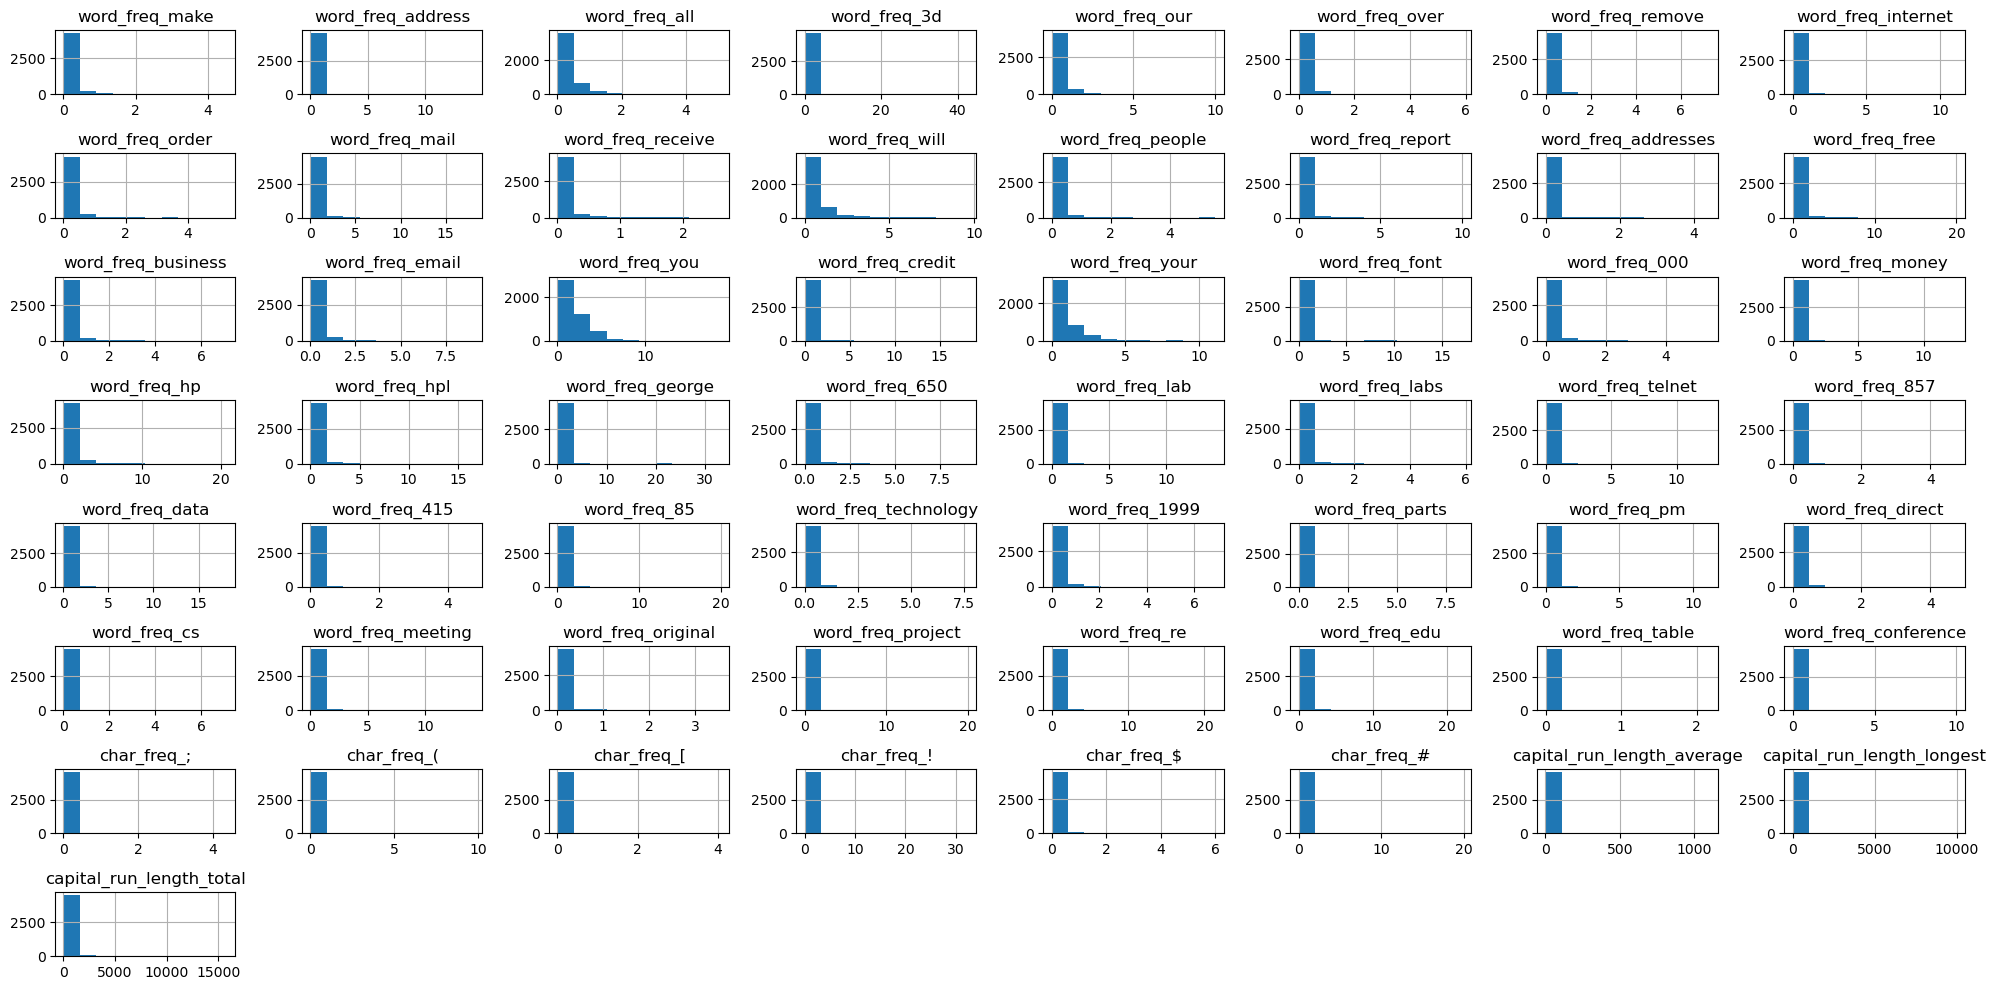

In [4]:
X.hist(figsize=(20,10))
plt.tight_layout()

### Observations
- Most of the features are uni modal in nature

# Splitting and Model training


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [10]:

mode=['Bernoulli','Guassian','Multinomial']
acc=[]
prec=[]
recall=[]
f1=[]

In [11]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
gnb=BernoulliNB()
gnb.fit(X_train,y_train)
acc.append(accuracy_score(y_test,gnb.predict(X_test)))
prec.append(precision_score(y_test,gnb.predict(X_test)))
recall.append(recall_score(y_test,gnb.predict(X_test)))
f1.append(f1_score(y_test,gnb.predict(X_test)))

c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
gnb=GaussianNB()
gnb.fit(X_train,y_train)
acc.append(accuracy_score(y_test,gnb.predict(X_test)))
prec.append(precision_score(y_test,gnb.predict(X_test)))
recall.append(recall_score(y_test,gnb.predict(X_test)))
f1.append(f1_score(y_test,gnb.predict(X_test)))

c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
gnb=MultinomialNB()
gnb.fit(X_train,y_train)
acc.append(accuracy_score(y_test,gnb.predict(X_test)))
prec.append(precision_score(y_test,gnb.predict(X_test)))
recall.append(recall_score(y_test,gnb.predict(X_test)))
f1.append(f1_score(y_test,gnb.predict(X_test)))

c:\Users\dsai9\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
df=pd.DataFrame(data={
    'mode':mode,
    'accuracy':acc,
    'precision':prec,
    'recall':recall,
    'f1_score':f1
})
df

,mode,accuracy,precision,recall,f1_score
0,Bernoulli,0.890659,0.914938,0.800363,0.853824
1,Guassian,0.833454,0.724476,0.940109,0.818325
2,Multinomial,0.826937,0.802326,0.751361,0.776007


### Observation
- The highest accuracy is provided by Bernoulli mainly because dataset has bernoulli distribution.
- Here recall is most important metric, because we need to minimze FN. 
- In minimizing recall department, Multinomial method shines. But Overall, Bernoulli is better for this dataset